# Vaccine RCT Examples


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

  
# Polio RCT

One of the earliest randomized experiments were the Polio vaccination trias conducted by the Public Health Service in 1954.  The question was whether Salk vaccine prevented polio.  Children in the study were randomly assigned either a treatment (polio vaccine shot) or a placebo (saline solution shot), without knowing which one they received. The doctors in the study, making the diagnosis, did not know whether a child received a vaccine or not. In other words, the trial was a double-blind, randomized control trial.  The trial had to be large, because the rate at which Polio occured in the population was 50 per 100,000.  The treatment group saw 33 polio cases per 200,745; the control group saw 115 cases per 201,229. The estimated avearage treatment effect is about
$$
-40
$$
with the 95% confidence band (based on approximate normality of the two sample means and their differences) is:
$$[-52, -28].$$
The confidence suggests that the Polio vaccine **caused** the reduction in the risk of polio.

The interesting thing here is that we don't need the underlying individual data to evaluate the effectivess of the vaccine. This is because the outcomes are Bernoulli random variabales, and we have enough information to compute the estimate of ATE as well as the confidence intervals.


We also compute Vaccine Efficacy metric, which (I googled  [CDC](https://www.cdc.gov/csels/dsepd/ss1978/lesson3/section6.html)) refers to the following measure:
$$
\operatorname{VE} = \frac{\text{Risk for Unvaccianted - Risk for Vaccinated}}{\text{Risk for Unvaccianted}}.
$$
It describes the relative reduction in risk caused by vaccination.


It is staighborward to get VE estimate by just plugging-in the numbers, but how do we get the approximate variance estimate. I am too lazy to do calculatios for the delta methods, so I will just use a simulation (a form of approximate bootstrap) to obtain the confidence intervals.



In [1]:
# Here we calculate the overall effectiveness of the vaccine and construct confidence intervals for it
NV =  200745 # number of vaccinated (treated)
NU =  201229 # number of unvaccinated (control)
RV = 33 / NV # average outcome for vaccinated 
RU = 115 / NU # average outcome for unvaccinated
VE = (RU - RV) / RU # vaccine efficacy

print(f"Overall vaccine efficacy is {VE:.4f}")

print(f"Incidence per 100000 among treated: {RV * 100000:.4f}")
print(f"Incidence per 100000 among controlled: {RU * 100000:.4f}")

# treatment effect: estimated reduction in incidence per 100k people
effect = 100000 * (RV - RU)

print(f"Estimate of effect on occurances per 100,000: {effect:.4f}")

# variance, standard deviation and confidence interval of ATE using
# the fact that outcomes are Bernoulli 
var_rv = RV * (1 - RV) / NV
var_ru = RU * (1 - RU) / NU
var_effect = (100000**2) * (var_rv + var_ru)
std_effect = np.sqrt(var_effect)

print(f"Standard error for ATE is: {std_effect}")

ci_effect = [effect - 1.96*std_effect, effect + 1.96*std_effect]

print(f"95% confidence interval is [{ci_effect[0]:.4f}, {ci_effect[1]:.4f}]")

Overall vaccine efficacy is 0.7124
Incidence per 100000 among treated: 16.4388
Incidence per 100000 among controlled: 57.1488
Estimate of effect on occurances per 100,000: -40.7101
Standard error for ATE is: 6.047412320702958
95% confidence interval is [-52.5630, -28.8571]


In [2]:
# we use approximate bootstrap to calculate confidence
# intervals for vaccine efficacy via Monte Carlo draws

np.random.seed(123)
B = 10000
RVs = RV  + np.random.normal(0, 1, B) * np.sqrt(var_rv)
RUs = RU  + np.random.normal(0, 1, B) * np.sqrt(var_ru)
VEs = (RUs - RVs) / RUs

CI_VE = np.quantile(VEs, (.025, .975))

print(f"95% confidence interval of VE is [{CI_VE[0]:.4f}, {CI_VE[1]:.4f}]")

95% confidence interval of VE is [0.5892, 0.8151]


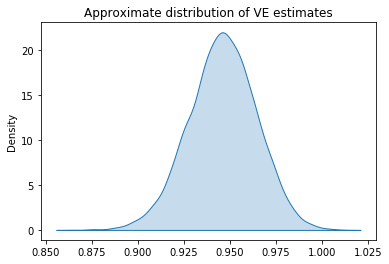

In [8]:
sns.kdeplot(VEs, shade=True)
plt.title("Approximate distribution of VE estimates")
plt.show()

# Pfizer/BNTX Covid-19 RCT

Here is a link to the FDA [briefing](https://www.fda.gov/media/144245/download) and an interesting [discussion](
https://garycornell.com/2020/12/09/statistics-in-the-pfizer-data-how-good-is-the-vaccine/?fbclid=IwAR282lS0Vl3tWmicQDDhIJAQCMO8NIsCXyWbUWwTtPuKcnuJ2v0VWXRDQac), as well as data.

Pfizer/BNTX is the first vaccine approved for emergency use to reduce the risk of Covid-19 decease. Volunteers were randomly assigned to receive either a treatment (2-dose vaccination) or a placebo, without knowing which they recieved. The doctors making the diagnoses did not know now whether a given volunteer received a vaccination or not. The results of the study are given in the following table:

![pfizer/biontech result table](https://lh6.googleusercontent.com/oiO6gYom1UZyrOhgpFx2iq8ike979u3805JHiVygP-Efh1Yaz2ttyPcgWKlT1AqHDM4v46th3EPIkOvRLyXA0fNUloPL-mL9eOFmSAzfbNOHyCZSQ0DyzMhcFUtQuZ520R5Qd2lj)

Here we see both the overall effects and the effects by age group. The confidence intervals for the averal ATE are tight and suggest high effectivness of the vaccine. The confidence intervals for the age group 65-75 are much wider.  We could group 65-75 and >75 groups to evaluate the effectiveness of the vaccine and also narrow down the width of the confidence band. 

In this case, the reported results are for vaccine effectiveness. We use the same approach as above.



In the code cell below  we calculate the overall effectiveness of the vaccie and construct confidence intervals for it.

In [2]:
NV =  19965
NU =  20172
RV = 9 / NV
RU = 169 / NU
VE = (RU - RV) / RU

print(f"Overall vaccine efficacy is {VE:.4f}")

print(f"Incidence per 100000 among treated: {RV * 100000:.4f}")
print(f"Incidence per 100000 among controlled: {RU * 100000:.4f}")

# treatment effect: estimated reduction in incidence per 100k people
effect = 100000 * (RV - RU)

print(f"Estimate of effect on occurances per 100,000: {effect:.4f}")

# variance, standard deviation and confidence interval of ATE using
# the fact that outcomes are Bernoulli 
var_rv = RV * (1 - RV) / NV
var_ru = RU * (1 - RU) / NU
var_effect = (100000**2) * (var_rv + var_ru)
std_effect = np.sqrt(var_effect)

print(f"Standard error for ATE is: {std_effect}")

ci_effect = [effect - 1.96*std_effect, effect + 1.96*std_effect]

print(f"95% confidence interval is [{ci_effect[0]:.4f}, {ci_effect[1]:.4f}]")

Overall vaccine efficacy is 0.9462
Incidence per 100000 among treated: 45.0789
Incidence per 100000 among controlled: 837.7950
Estimate of effect on occurances per 100,000: -792.7161
Standard error for ATE is: 65.91015718590171
95% confidence interval is [-921.9000, -663.5322]


95% confidence interval of VE is [0.9086, 0.9809]


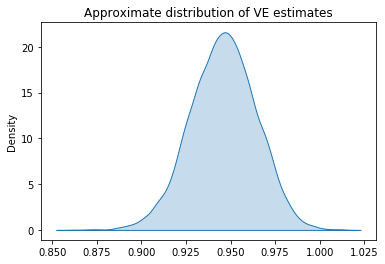

In [4]:
# we use approximate bootstrap to calculate confidence
# intervals for vaccine efficacy via Monte Carlo draws

np.random.seed(123)
B = 10000
RVs = RV  + np.random.normal(0, 1, B) * np.sqrt(var_rv)
RUs = RU  + np.random.normal(0, 1, B) * np.sqrt(var_ru)
VEs = (RUs - RVs) / RUs

CI_VE = np.quantile(VEs, (.025, .975))

print(f"95% confidence interval of VE is [{CI_VE[0]:.4f}, {CI_VE[1]:.4f}]")

sns.kdeplot(VEs, shade=True)
plt.title("Approximate distribution of VE estimates")
plt.show()

In the code cell below  we calculate the effectiveness of the vaccine for the two groups that are 65 or older

Overall vaccine efficacy is 0.9471
Two-sided 95% confidence interval of VE is [0.8134, 1.0518]
One-sided 95% confidence interval of VE is [0.8438, 1]


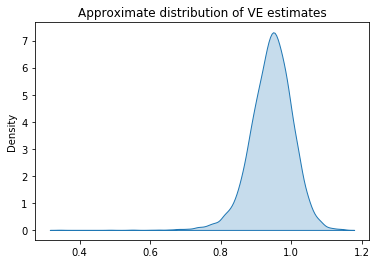

In [7]:
NV =  3239 + 805
NU =  3255 + 812
RV = 1 / NV
RU = (14 + 5) / NU
VE = (RU - RV)/RU;


print(f"Overall vaccine efficacy is {VE:.4f}")
var_rv = RV * (1 - RV) / NV
var_ru = RU * (1 - RU) / NU

np.random.seed(123)
B = 10000
RVs = RV  + np.random.normal(0, 1, B) * np.sqrt(var_rv) + 1e-10
RUs = RU  + np.random.normal(0, 1, B) * np.sqrt(var_ru) + 1e-10
VEs = (RUs - RVs) / RUs

CI_VE = np.quantile(VEs, (.025, .975))

print(f"Two-sided 95% confidence interval of VE is [{CI_VE[0]:.4f}, {CI_VE[1]:.4f}]")

CI_VE = np.quantile(VEs, (.05))

print(f"One-sided 95% confidence interval of VE is [{CI_VE:.4f}, 1]")


sns.kdeplot(VEs, shade=True)
plt.title("Approximate distribution of VE estimates")
plt.show()

Let's try the Binomial parametric bootsrtap using the fact that outcomes are Bernoulli

Overall vaccine efficacy is 0.9471
Two-sided 95% confidence interval of VE is [0.8000, 1.0000]
One-sided 95% confidence interval of VE is [0.8333, 1]


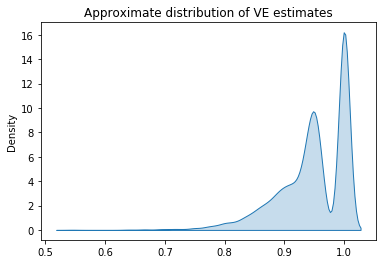

In [8]:
NV =  3239 + 805
NU =  3255 + 812
RV = 1 / NV
RU = (14 + 5) / NU
VE = (RU - RV)/RU;


print(f"Overall vaccine efficacy is {VE:.4f}")
var_rv = RV * (1 - RV) / NV
var_ru = RU * (1 - RU) / NU

np.random.seed(123)
B = 10000
RVs = np.random.binomial(NV, RV, size=B) + 1e-10
RUs = np.random.binomial(NU, RU, size=B) + 1e-10
VEs = (RUs - RVs) / RUs

CI_VE = np.quantile(VEs, (.025, .975))

print(f"Two-sided 95% confidence interval of VE is [{CI_VE[0]:.4f}, {CI_VE[1]:.4f}]")

CI_VE = np.quantile(VEs, (.05))

print(f"One-sided 95% confidence interval of VE is [{CI_VE:.4f}, 1]")


sns.kdeplot(VEs, shade=True)
plt.title("Approximate distribution of VE estimates")
plt.show()

# More Accurate Confidence Intervals

The table from the FDA uses exact inference by inverting tests based on the exact binomial nature of the outcome variable. This method is known as the Cornfield Procedure to find the exact confidence interval on the estimate of vaccine efficacy.

Another typical more accurate approximation is to approximate the log of the risks by a normal distribution, construct confidence intervals for the quantity $\log(RV) - \log(RU)$ and then invert. This is for instance method C in [this paper](https://www.jstor.org/stable/pdf/2530610.pdf) and is implemented in the statsmodels package (and also in the `scipy.stats.contengency_table` package).

In [7]:
tb = sm.stats.Table2x2([[9, 19965 - 9], [169, 20172 - 169]])
tb.summary()

,Estimate,SE,LCB,UCB,p-value
Odds ratio,0.053,,0.027,0.104,0.000
Log odds ratio,-2.930,0.342,-3.601,-2.260,0.000
Risk ratio,0.054,,0.028,0.105,0.000
Log risk ratio,-2.922,0.342,-3.593,-2.252,0.000


In [16]:
print(f"Overall vaccine efficacy is {1 - tb.riskratio:.4f}")
lb, ub = tb.riskratio_confint(alpha=.05)
print(f"Approximate 95% confidence interval of VE: [{1 - ub:.4f}, {1 - lb:.4f}]")

Overall vaccine efficacy is 0.9462
Approximate 95% confidence interval of VE: [0.8948, 0.9725]


We see that this matches much more accurately the table from the FDA.